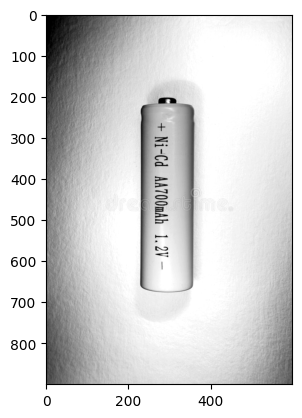

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2
from tqdm import tqdm

DATADIR = "D:/bahan_datasets"

CATEGORIES = ["sampah_baterai","sampah_botol_plastik","sampah_daun", "sampah_elektronik","sampah_kaca",
"sampah_kaleng","sampah_kantongplastik","sampah_kayu", "sampah_kertas", "sampah_makanan", "sampah_organik"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

<function matplotlib.pyplot.show(close=None, block=None)>

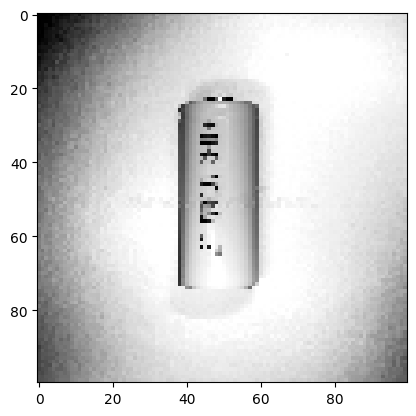

In [5]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show

In [7]:
training_data = []
def create_training_data():
    for category in CATEGORIES:

        path =os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

100%|██████████| 671/671 [00:22<00:00, 29.35it/s]


5877


In [8]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])


5
7
0
0
4
10
5
0
3
7


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE,IMG_SIZE,1))
X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE,1)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


In [41]:
import pickle
import os

folder_path = "D:/bahan_pickle"

# Daftar nama file dalam folder
file_names = ["sampah_baterai","sampah_botol_plastik","sampah_daun", "sampah_elektronik","sampah_kaca",
"sampah_kaleng","sampah_kantongplastik","sampah_kayu", "sampah_kertas", "sampah_makanan", "sampah_organik"]

X = "datasets" # Inisialisasi variabel X dengan data yang sesuai

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Membuka file untuk operasi write binary
    pickle_out = open(file_path, "wb")
    
    # Melakukan pickle pada data X atau y, sesuaikan dengan kebutuhan
    pickle.dump(X, pickle_out)
    
    # Menutup file
    pickle_out.close()


In [2]:

import pickle
import os

folder_path = "D:/bahan_pickle"

# Mendapatkan daftar file dalam folder
file_names = os.listdir(folder_path)

# Inisialisasi list kosong untuk menyimpan hasil pembacaan pickle
data = []

# Loop melalui setiap file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Membuka file untuk operasi read binary
    pickle_in = open(file_path, "rb")
    
    # Membaca objek pickle dari file dan menambahkannya ke dalam list data
    obj = pickle.load(pickle_in)
    data.append(obj)
    
    # Menutup file
    pickle_in.close()

# Memisahkan hasil pembacaan menjadi variabel X dan y
X = data[1]
y = data[0]


In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [5]:


import pickle
import os
input_tensor = tf.convert_to_tensor

folder_path = "D:/bahan_pickle"

# Mendapatkan daftar file dalam folder
file_names = os.listdir(folder_path)

# Inisialisasi list kosong untuk menyimpan hasil pembacaan pickle
data = []

# Loop melalui setiap file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Membuka file untuk operasi read binary
    pickle_in = open(file_path, "rb")
    
    # Membaca objek pickle dari file dan menambahkannya ke dalam list data
    obj = pickle.load(pickle_in)
    data.append(obj)
    
    # Menutup file
    pickle_in.close()

# Memisahkan hasil pembacaan menjadi variabel X dan y
X = data[1]
y = data[0]

# Menghapus nilai string dalam X
X = [x for x in X if isinstance(x, (int, float))]
X = [float(x) / 200.0 for x in X]



In [4]:
print(X)
print(type(X))


datasets
<class 'str'>


In [6]:
import tensorflow as tf
import pickle
import numpy as np

In [12]:
pickle_in = open("Cat","rb")
X = pickle.load(pickle_in)

pickle_in = open("Dog","rb")
y = pickle.load(pickle_in)

X = X/200.0

In [2]:
import pickle
import os
import tensorflow as tf

folder_path = "D:/bahan_pickle"

# Mendapatkan daftar file dalam folder
file_names = os.listdir(folder_path)

# Inisialisasi list kosong untuk menyimpan hasil pembacaan pickle
data = []

# Loop melalui setiap file
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Membuka file untuk operasi read binary
    pickle_in = open(file_path, "rb")
    
    # Membaca objek pickle dari file dan menambahkannya ke dalam list data
    obj = pickle.load(pickle_in)
    data.append(obj)
    
    # Menutup file
    pickle_in.close()

# Memisahkan hasil pembacaan menjadi variabel X dan y
X_train = data[1]
y_train = data[0]

# Menghapus nilai string dalam X_train
X_train = [x for x in X_train if isinstance(x, (int, float))]
X_train = [float(x) / 200.0 for x in X_train]

# Mengkonversi X_train menjadi tensor menggunakan TensorFlow
input_tensor = tf.convert_to_tensor(X_train)


In [8]:
import numpy as np
import tensorflow as tf

model = tf.keras.Sequential()

# Lapisan konvolusi pertama
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Lapisan konvolusi kedua
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Lapisan konvolusi ketiga
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten output dari lapisan konvolusi sebelumnya
model.add(tf.keras.layers.Flatten())

# Lapisan fully connected pertama
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Lapisan fully connected terakhir dengan jumlah kelas yang sesuai dengan jumlah jenis dataset
model.add(tf.keras.layers.Dense(64, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 64)

ValueError: invalid literal for int() with base 10: 'datasets'

In [11]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

IndexError: tuple index out of range

In [14]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in =open("Dog","rb")
y_train = pickle.load(pickle_in)
input_tensor = tf.convert_to_tensor

In [15]:
X_train = X_train/255.0

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),
input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(tf.keras.layers.Conv2D(32,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


In [17]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

In [18]:
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [20]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [21]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
13/13 [==============================] - 22s 964ms/step - loss: 0.7273 - accuracy: 0.5237
Epoch 2/10
13/13 [==============================] - 12s 886ms/step - loss: 0.6897 - accuracy: 0.5162
Epoch 3/10
13/13 [==============================] - 12s 946ms/step - loss: 0.6657 - accuracy: 0.6534
Epoch 4/10
13/13 [==============================] - 12s 936ms/step - loss: 0.7093 - accuracy: 0.5287
Epoch 5/10
13/13 [==============================] - 13s 1s/step - loss: 0.6568 - accuracy: 0.6185
Epoch 6/10
13/13 [==============================] - 11s 851ms/step - loss: 0.6043 - accuracy: 0.7182
Epoch 7/10
13/13 [==============================] - 11s 852ms/step - loss: 0.5550 - accuracy: 0.7406
Epoch 8/10
13/13 [==============================] - 12s 897ms/step - loss: 0.4880 - accuracy: 0.7830
Epoch 9/10
13/13 [==============================] - 11s 857ms/step - loss: 0.4087 - accuracy: 0.8504
Epoch 10/10
13/13 [==============================] - 11s 849ms/step - loss: 0.3108 - accuracy:

In [22]:
import tensorflow as tf
logdir = "logs/Cats-vs-dogs-CNN"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [23]:
model.fit(X_train,y_train,epochs=10,batch_size=32,callbacks=[tensorboard_callback])

Epoch 1/10
13/13 [==============================] - 18s 1s/step - loss: 0.2230 - accuracy: 0.9352
Epoch 2/10
13/13 [==============================] - 14s 1s/step - loss: 0.1829 - accuracy: 0.9526
Epoch 3/10
13/13 [==============================] - 13s 971ms/step - loss: 0.1165 - accuracy: 0.9950
Epoch 4/10
13/13 [==============================] - 13s 995ms/step - loss: 0.0819 - accuracy: 0.9875
Epoch 5/10
13/13 [==============================] - 14s 1s/step - loss: 0.0558 - accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 14s 1s/step - loss: 0.0342 - accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 14s 1s/step - loss: 0.0279 - accuracy: 1.0000
Epoch 8/10
13/13 [==============================] - 18s 1s/step - loss: 0.0239 - accuracy: 1.0000
Epoch 9/10
13/13 [==============================] - 21s 2s/step - loss: 0.0129 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 15s 1s/step - loss: 0.0098 - accuracy: 1.0000


In [1]:
import tensorflow as tf 
import numpy as np
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard

In [2]:
logdir = "Cat-vs-dogs-CNN"

In [3]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)

X_train = X_train/255.0

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(256,(3,3),
input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [5]:
model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))

In [7]:
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [8]:
tensorboard = TensorBoard(log_dir="logs/{},".format(logdir))

In [9]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [10]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [11]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.3,callbacks=[tensorboard])

Epoch 1/10
9/9 [==============================] - 612s 68s/step - loss: 1.4376 - accuracy: 0.5393 - val_loss: 0.6871 - val_accuracy: 0.5702
Epoch 2/10
9/9 [==============================] - 450s 51s/step - loss: 0.6974 - accuracy: 0.4929 - val_loss: 0.6928 - val_accuracy: 0.5041
Epoch 3/10
9/9 [==============================] - 367s 41s/step - loss: 0.6879 - accuracy: 0.5964 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 4/10
9/9 [==============================] - 386s 44s/step - loss: 0.6689 - accuracy: 0.6286 - val_loss: 0.6857 - val_accuracy: 0.5455
Epoch 5/10
9/9 [==============================] - 447s 51s/step - loss: 0.6393 - accuracy: 0.6464 - val_loss: 0.6919 - val_accuracy: 0.5289
Epoch 6/10
9/9 [==============================] - 426s 47s/step - loss: 0.5580 - accuracy: 0.7464 - val_loss: 0.7296 - val_accuracy: 0.5207
Epoch 7/10
9/9 [==============================] - 513s 59s/step - loss: 0.4587 - accuracy: 0.8071 - val_loss: 0.7761 - val_accuracy: 0.5289
Epoch 8/10
9/9 [====

In [7]:
import tensorflow as tf
import numpy as np
import pickle 
import time
from tensorflow.keras.callbacks import TensorBoard

In [8]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)
X_train =X_train/255.0
input_tensor = tf.convert_to_tensor

In [9]:
import time 
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layers,int(time.time()))
            print(NAME)

1-conv-32-nodes-[0, 1, 2]-dense-1685931044
2-conv-32-nodes-[0, 1, 2]-dense-1685931044
3-conv-32-nodes-[0, 1, 2]-dense-1685931044
1-conv-64-nodes-[0, 1, 2]-dense-1685931044
2-conv-64-nodes-[0, 1, 2]-dense-1685931044
3-conv-64-nodes-[0, 1, 2]-dense-1685931044
1-conv-128-nodes-[0, 1, 2]-dense-1685931044
2-conv-128-nodes-[0, 1, 2]-dense-1685931044
3-conv-128-nodes-[0, 1, 2]-dense-1685931044
1-conv-32-nodes-[0, 1, 2]-dense-1685931044
2-conv-32-nodes-[0, 1, 2]-dense-1685931044
3-conv-32-nodes-[0, 1, 2]-dense-1685931044
1-conv-64-nodes-[0, 1, 2]-dense-1685931044
2-conv-64-nodes-[0, 1, 2]-dense-1685931044
3-conv-64-nodes-[0, 1, 2]-dense-1685931044
1-conv-128-nodes-[0, 1, 2]-dense-1685931044
2-conv-128-nodes-[0, 1, 2]-dense-1685931044
3-conv-128-nodes-[0, 1, 2]-dense-1685931044
1-conv-32-nodes-[0, 1, 2]-dense-1685931044
2-conv-32-nodes-[0, 1, 2]-dense-1685931044
3-conv-32-nodes-[0, 1, 2]-dense-1685931044
1-conv-64-nodes-[0, 1, 2]-dense-1685931044
2-conv-64-nodes-[0, 1, 2]-dense-1685931044
3-con

In [12]:
dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME ="{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer, int(time.time()))
            print(NAME)

            model = tf.keras.Sequential

1-conv-32-nodes-0-dense-1685931935
2-conv-32-nodes-0-dense-1685931935
3-conv-32-nodes-0-dense-1685931935
1-conv-64-nodes-0-dense-1685931935
2-conv-64-nodes-0-dense-1685931935
3-conv-64-nodes-0-dense-1685931935
1-conv-128-nodes-0-dense-1685931935
2-conv-128-nodes-0-dense-1685931935
3-conv-128-nodes-0-dense-1685931935
1-conv-32-nodes-1-dense-1685931935
2-conv-32-nodes-1-dense-1685931935
3-conv-32-nodes-1-dense-1685931935
1-conv-64-nodes-1-dense-1685931935
2-conv-64-nodes-1-dense-1685931935
3-conv-64-nodes-1-dense-1685931935
1-conv-128-nodes-1-dense-1685931935
2-conv-128-nodes-1-dense-1685931935
3-conv-128-nodes-1-dense-1685931935
1-conv-32-nodes-2-dense-1685931935
2-conv-32-nodes-2-dense-1685931935
3-conv-32-nodes-2-dense-1685931935
1-conv-64-nodes-2-dense-1685931935
2-conv-64-nodes-2-dense-1685931935
3-conv-64-nodes-2-dense-1685931935
1-conv-128-nodes-2-dense-1685931935
2-conv-128-nodes-2-dense-1685931935
3-conv-128-nodes-2-dense-1685931935


In [4]:
import tensorflow as tf
import numpy as np
import pickle 
import time
from tensorflow.keras.callbacks import TensorBoard

In [5]:
pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)
pickle_in = open("X.pickle","rb")
y= pickle.load(pickle_in)
X_train = X_train/255.0

In [11]:
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
input_shape = (28, 28, 1)
for dense_layers in [dense_layers]:
    for layers_size in [layers_size]:
        for conv_layers in [conv_layers]:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,int(time.time()))
            print(NAME)
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Conv2D(layer_size,(3,3),
            input_shape=tuple(X_train.shape[1:])))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        for l in range(int(conv_layers[0])-1):
            model.add(tf.keras.layers.Conv2D(layer_size,(3,3)))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

            model.add(tf.keras.layers.Flatten())

        for _ in range(int(dense_layers[0])):
            model.add(tf.keras.layers.Dense(layer_size)) 
            model.add(tf.keras.layers.Activation('relu'))

            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{},".format(logdir))
            model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
            X_train = np.asarray(X_train)
            y_train = np.asarray(y_train)

            model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.3,callback=[tensorboard])
            

[1, 2, 3]-conv-[32, 64, 128]-nodes-[0, 1, 2]-dense-1685931627


TypeError: '<=' not supported between instances of 'list' and 'int'

In [1]:
import tensorflow as tf
import numpy as np
import pickle 
import time
from tensorflow.keras.callbacks import TensorBoard

In [2]:
pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)
X_train =X_train/255.0
input_tensor = tf.convert_to_tensor

In [3]:
dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]
for dense_layers in [dense_layers]:
    for layers_size in [layer_sizes]:
        for conv_layers in [conv_layers]:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,int(time.time()))
            print(NAME)
            model = tf.keras.Sequential()
            model.add(tf.keras.layers.Conv2D(layer_size,(3,3),
            input_shape=tuple(X_train.shape[1:])))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
        for l in range(int(conv_layers[0])-1):
            model.add(tf.keras.layers.Conv2D(layer_size,(3,3)))
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

            model.add(tf.keras.layers.Flatten())

        for _ in range(int(dense_layers[0])):
            model.add(tf.keras.layers.Dense(layer_size)) 
            model.add(tf.keras.layers.Activation('relu'))

            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{},".format(logdir))
            model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
            X_train = np.asarray(X_train)
            y_train = np.asarray(y_train)

            model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.3,callback=[tensorboard])

            model.save('64x3-CNN.model')

[3]-conv-[64]-nodes-[0]-dense-1685930984


NameError: name 'layer_size' is not defined

In [10]:
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
for dense_layers in dense_layers:
    for layers_size in layers_size:
        for conv_layers in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,time.time())
            print(NAME)

            model = tf.keras.Sequential()

            model.add(tf.keras.layers.Conv2D(layers_size,(3,3),input_shape=X.shape[1:]),
            model.add(tf.keras.layers.Activation('relu')),
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),

            for l in range(conv_layers-1):
                 model.add(tf.keras.layers.Conv2D(layers_size,(3,3)
                model.add(tf.keras.layers.Activation('relu'))
                model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

        

SyntaxError: invalid syntax (4020393149.py, line 16)

In [20]:
import time
import pickle

pickle_in = open("Cat","rb")
X_train = pickle.load(pickle_in)
pickle_in = open("Dog","rb")
y_train = pickle.load(pickle_in)

X_train = X_train/255.0
dense_layers = [0 ,1 ,2]
layers_size = [32,64,128]
conv_layers = [1,2,3]
for dense_layers in dense_layers:
    for layers_size in layers_size:
        for conv_layers in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers,layers_size,dense_layers,time.time())
            print(NAME)

            model = tf.keras.Sequential()

            model.add(tf.keras.layers.Conv2D(layers_size,(3,3),input_shape=X.shape[1:])
            model.add(tf.keras.layers.Activation('relu'))
            model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layers-1):
                model.add(tf.keras.layers.Conv2D(layers_size,(3,3)
                model.add(tf.keras.layers.Activation('relu'))
                model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

            model.add(tf.keras.layers.Flatten())
            for _ in range(dense_layers):
                model.add(tf.keras.layers.Dense(layers_size))
                model.add(tf.keras.layers.Activation('relu'))

            model.add(tf.keras.layers.Dense(1))
            model.add(tf.keras.layers.Activation('sigmoid'))

SyntaxError: invalid syntax (1797644044.py, line 17)

In [43]:
NAME = "Cats-vs-dogs-CNN"
tensorboard = TensorBoard(log_dir="logs{}".format(NAME))

NameError: name 'TensorBoard' is not defined

In [12]:
import pickle
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
path = "D:/PetImages/Dog/"

with strategy.scope():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
    model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.metrics.mse)
    model.fit(np.array([[1]]),np.array([[1]]))
    tf.keras.models.save_model(model,pickle_in)
    tf.keras.models.load_model(pickle_in)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
1/1 [==============================] - 6s 6s/step - loss: 6.2007


AttributeError: '_io.BufferedReader' object has no attribute 'endswith'

In [17]:
model.add(layers.Conv2D(32,(3,3), activation='relu'),input_shape=(32,32,3))

TypeError: Sequential.add() got an unexpected keyword argument 'input_shape'

In [9]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

ValueError: Input 0 of layer "max_pooling2d" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 1352)

In [40]:
model.add(tf.keras.layers.Flatten())

In [41]:
model.add(tf.keras.layers.Dense(units=64,activation=tf.nn.relu))

In [46]:
model.add(tf.keras.layers.Dropout(rate=0.2)),
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)),
model.compile(optimizer='adam',loss='sparsecategorical_crosentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                346176    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [1]:
model.fit(epochs=3)

NameError: name 'model' is not defined

In [14]:
import numpy as np
import tensorflow as tf


In [17]:
datasets = tf.data.Dataset.list_files("D:/PetImages/Cat")

def load_and_preprocesing_image(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image,(256,256))
    image = tf.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=0.5)
    return image

    datasets = datasets.map(load_and_preprocesing_image)

    datasets = datasets.batch(32)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense)
model.add(tf.keras.layers.MaxPooling2D)

model.compile(optimizer=tf.keras.optimizers.Adam(),
loos=tf.keras.losses.SparseCategoricalCrossentropy())

model.fit(datasets,epochs=10)

model.evaluate(datasets)

TypeError: The added layer must be an instance of class Layer. Received: layer=<class 'keras.layers.core.dense.Dense'> of type <class 'type'>.

In [13]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
path = "D:/PetImages/Dog/"

with strategy.scope():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(1,input_shape=(1,))])
    model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.metrics.mse)
    model.fit(np.array([[1]]),np.array([[1]]))
    tf.keras.models.save_model(model,path)
    tf.keras.models.load_model(path)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
1/1 [==============================] - 11s 11s/step - loss: 0.4415


INFO:tensorflow:Assets written to: D:/PetImages/Dog/assets


INFO:tensorflow:Assets written to: D:/PetImages/Dog/assets


In [ ]:
()